# Vizualizace

V Pythonu můžeme využívat spoustu různých knihoven na generování vizualizací. Velmi oblíbenou je knihovna `matplotlib`. Nad knihovnou `matplotlib` byla vytvořena knihovna `seaborn`, která zjednodušuje tvorbu některých typů vizualizací.

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [35]:
# Z minule lekce
url_food_sample_100 = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/nacteni-dat/nacteni-dat/food_sample_100.csv"
url_food_other = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/pokrocile-upravy/food_other.csv"
url_food_nutrient = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/podmineny-vyber/podmineny-vyber/food_nutrient.csv"
url_branded_food = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/excs/znacky/branded_food.csv"

food_sample_100 = pd.read_csv(url_food_sample_100)
food_other = pd.read_csv(url_food_other)
food_nutrient = pd.read_csv(url_food_nutrient)
branded_food = pd.read_csv(url_branded_food)

food = pd.concat([food_sample_100, food_other])
food_merged = pd.merge(food, food_nutrient, on="fdc_id")

food_merged_brands = pd.merge(food_merged, branded_food, on="fdc_id")
food_merged_brands = food_merged_brands.rename(columns={"name": "nutrient_name"})

food_merged_brands.head(2)

,fdc_id,data_type,description,food_category_id,publication_date,nutrient_id,amount,data_points,derivation_id,min,...,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
0,1106032,branded_food,"Chicken, FC Beer Battered Boneless Wing Fritte...",NaN,2020-11-13,1257,NaN,NaN,71.0,NaN,...,Meat/Poultry/Other Animals Prepared/Processed,GDSN,NaN,2020-09-03,2020-11-13,United States,NaN,NaN,NaN,NaN
1,1106032,branded_food,"Chicken, FC Beer Battered Boneless Wing Fritte...",NaN,2020-11-13,1253,24.0,NaN,71.0,NaN,...,Meat/Poultry/Other Animals Prepared/Processed,GDSN,NaN,2020-09-03,2020-11-13,United States,NaN,NaN,NaN,NaN


In [16]:
top_cat_list = [
    "Candy",
    "Popcorn, Peanuts, Seeds & Related Snacks",
    "Cheese",
    "Ice Cream & Frozen Yogurt",
    "Chips, Pretzels & Snacks",
    "Cookies & Biscuits",
    "Pickles, Olives, Peppers & Relishes",
    "Breads & Buns",
    "Fruit & Vegetable Juice, Nectars & Fruit Drinks",
    "Snack, Energy & Granola Bars",
    "Chocolate",
    "Other Snacks",
]
food_top_cat = food_merged_brands[
    food_merged_brands["branded_food_category"].isin(top_cat_list)
]

food_top_cat.head(2)

,fdc_id,data_type,description,food_category_id,publication_date,nutrient_id,amount,data_points,derivation_id,min,...,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
30,1107295,branded_food,"ORIGINAL ROUNDS TORTILLA CHIPS, ORIGINAL",NaN,2020-11-13,1257,NaN,NaN,70.0,NaN,...,"Chips, Pretzels & Snacks",LI,NaN,2020-04-08,2020-11-13,United States,NaN,NaN,NaN,NaN
31,1107295,branded_food,"ORIGINAL ROUNDS TORTILLA CHIPS, ORIGINAL",NaN,2020-11-13,1293,15.0,NaN,70.0,NaN,...,"Chips, Pretzels & Snacks",LI,NaN,2020-04-08,2020-11-13,United States,NaN,NaN,NaN,NaN


In [ ]:
#sns.countplot je užitečný pro vizualizaci počtu výskytů v kategorii
#sns.barplot je flexibilnější a umožňuje vizualizovat různé statistické vztahy v datech. 

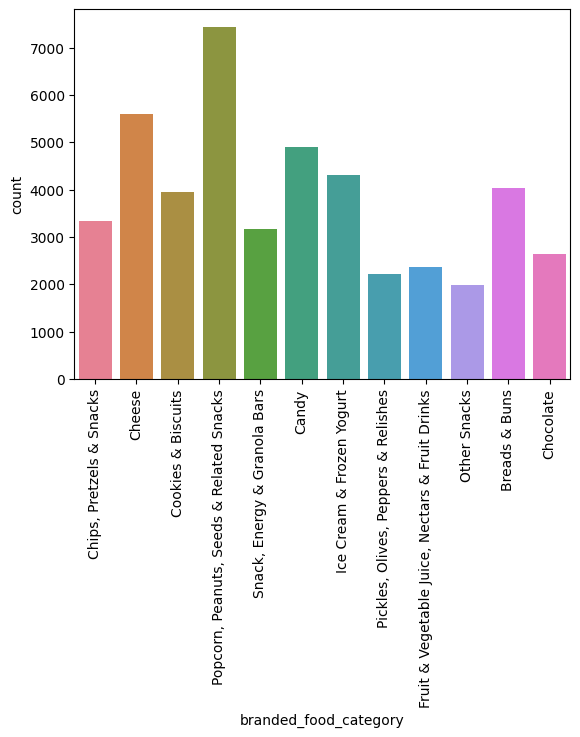

In [32]:
ax = sns.countplot(food_top_cat,
                   x="branded_food_category", 
                   hue="branded_food_category")
ax.tick_params(axis="x", rotation=90)

In [36]:
food_merged_brands["branded_food_category"] = food_merged_brands[
    "branded_food_category"
].replace(
    {
        "Candy": "Cukrovinky",
        "Popcorn, Peanuts, Seeds & Related Snacks": "Slané snacky",
        "Cheese": "Sýry",
        "Ice Cream & Frozen Yogurt": "Zmrzlina",
        "Chips, Pretzels & Snacks": "Chipsy",
        "Cookies & Biscuits": "Sušenky",
        "Pickles, Olives, Peppers & Relishes": "Nakl. zelenina",
        "Breads & Buns": "Pečivo",
        "Fruit & Vegetable Juice, Nectars & Fruit Drinks": "Džusy",
        "Snack, Energy & Granola Bars": "En. tyčinky",
        "Chocolate": "Čokoláda",
        "Other Snacks": "Další snacky",
    }
)
food_list = [
    "Cukrovinky",
    "Slané snacky",
    "Sýry",
    "Zmrzlina",
    "Chipsy",
    "Sušenky",
    "Nakl. zelenina",
    "Pečivo",
    "Džusy",
    "En. tyčinky",
    "Čokoláda",
    "Další snacky",
]
food_top_cat = food_merged_brands[
    food_merged_brands["branded_food_category"].isin(food_list)
]

In [17]:
ax.set(xlabel="vodorovna", ylabel="svisla", title="Graf")
# změní popisek vodorovné osy na hodnotu "vodorovna", svislé na hodnotu "svisla" a titulek grafu na "Graf"

[Text(0.5, 24.0, 'vodorovna'),
 Text(24.499999999999986, 0.5, 'svisla'),
 Text(0.5, 1.0, 'Graf')]

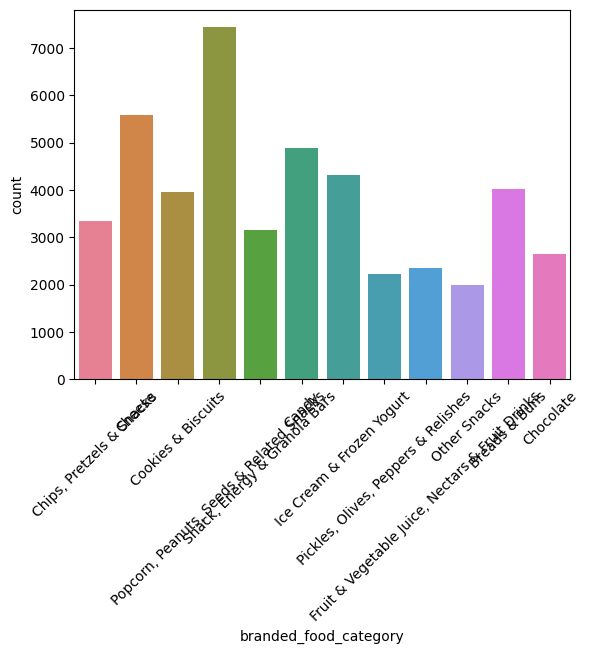

In [18]:
ax = sns.countplot(food_top_cat, x="branded_food_category",hue="branded_food_category")
ax.tick_params(axis="x", rotation=45)



[Text(0.5, 0, 'Kategorie'),
 Text(0, 0.5, 'Počet potravin'),
 Text(0.5, 1.0, 'Počty potravin ve 12 nejpočetnějších kategoriích')]

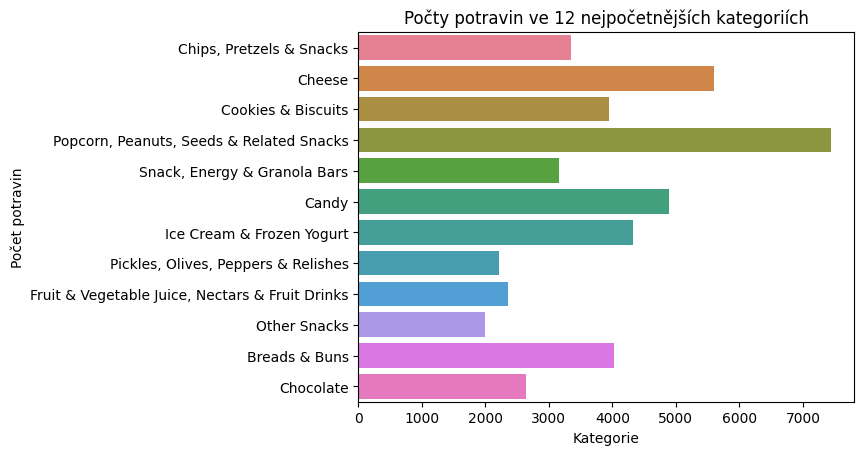

In [19]:
ax = sns.countplot(food_top_cat, y="branded_food_category", hue="branded_food_category")
ax.tick_params(axis="x", rotation=0)

ax.set(
    xlabel="Kategorie",
    ylabel="Počet potravin",
    title="Počty potravin ve 12 nejpočetnějších kategoriích",
)

In [31]:
food_merged_brands_protein = food_merged_brands[
    food_merged_brands["nutrient_name"] == "Protein"
]

[Text(0.5, 0, 'Množství proteinu (g)'),
 Text(0, 0.5, 'Počet potravin'),
 Text(0.5, 1.0, 'Množství proteinů v potravinách')]

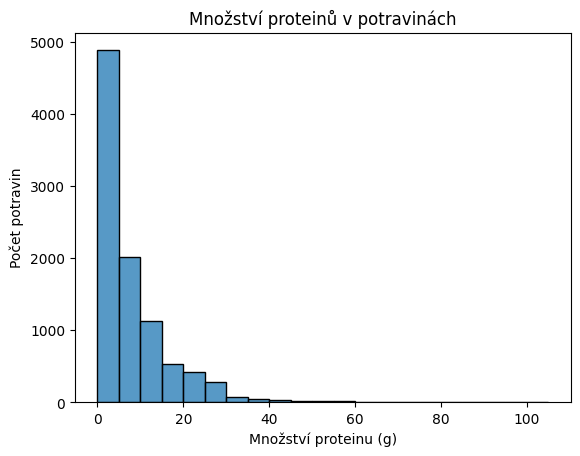

In [32]:
food_merged_brands_protein = food_merged_brands[
    food_merged_brands["nutrient_name"] == "Protein"
]
ax = sns.histplot(food_merged_brands_protein, x="amount", bins=range(0,110,5))

ax.set(
    xlabel="Množství proteinu (g)",
    ylabel="Počet potravin",
    title="Množství proteinů v potravinách",
)

In [ ]:
# Histogram, jako je funkce sns.histplot v knihovně Seaborn, 
# je nejvhodnější pro zobrazení rozdělení spojité proměnné. 
# Pomocí histogramu můžete vizualizovat, jak jsou data rozložena napříč různými hodnotami spojité proměnné.

In [ ]:
# Parametr bins v funkci sns.histplot ovlivňuje počet sloupců histogramu. 
# Tento parametr určuje, jak jsou data rozdělena do různých intervalů na ose x, což může ovlivnit interpretaci distribuce dat.

[Text(0.5, 0, 'Množství proteinu (g)'),
 Text(0, 0.5, 'Počet potravin'),
 Text(0.5, 1.0, 'Množství proteinů v potravinách')]

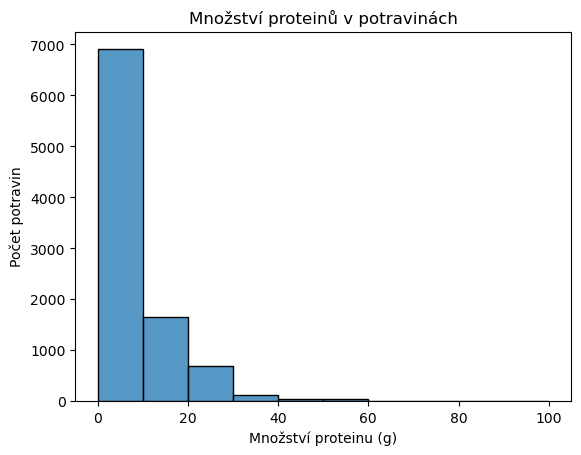

In [ ]:
ax = sns.histplot(food_merged_brands_protein, x="amount", bins=range(0, 110, 10))

ax.set(
    xlabel="Množství proteinu (g)",
    ylabel="Počet potravin",
    title="Množství proteinů v potravinách",
)

In [ ]:
#Parametr hue v knihovně Seaborn se používá pro rozlišení datových bodů podle kategorie. 
# Tímto způsobem můžete vizualizovat dodatečnou dimenzi dat tím, že každé kategorii přiřadíte jinou barvu.

[Text(0.5, 0, 'Kategorie'),
 Text(0, 0.5, 'Množství proteinu (g)'),
 Text(0.5, 1.0, 'Průměrné množství proteinů v potravinách')]

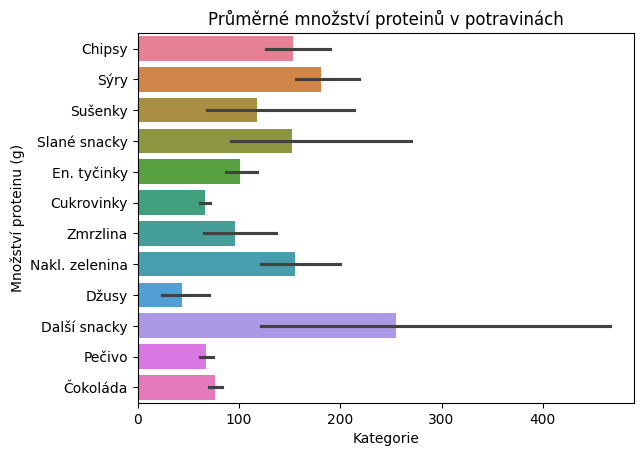

In [40]:
food_brands_top_nut = pd.merge(branded_food, food_nutrient, on="fdc_id")

ax = sns.barplot(food_top_cat, y="branded_food_category", x="amount",hue="branded_food_category")
ax.tick_params(axis="x", rotation=0)

ax.set(
    xlabel="Kategorie",
    ylabel="Množství proteinu (g)",
    title="Průměrné množství proteinů v potravinách",
)

In [26]:
food_merged_brands["nutrient_name"] = food_merged_brands["nutrient_name"].replace(
    {"Total lipid (fat)": "Lipid (tuk)", "Protein": "Protein"}
)

In [ ]:
#pokud jsou ve boxplotu vidět body mimo hlavní box a whiskers
#Body, které vidíte mimo hlavní box a whiskers ve boxplotu, se nazývají “outliers” nebo výjimky.
# Tyto body představují extrémní hodnoty, které jsou výrazně odlišné od ostatních hodnot v datech.
# Neznamená to nutně, že se jedná o chyby v datech, ale mohou to být hodnoty, které stojí za další analýzou.

[Text(0.5, 0, 'Kategorie'),
 Text(0, 0.5, 'Množství v gramech'),
 Text(0.5, 1.0, 'Množství proteinů a lipidů (tuků) v potravinách')]

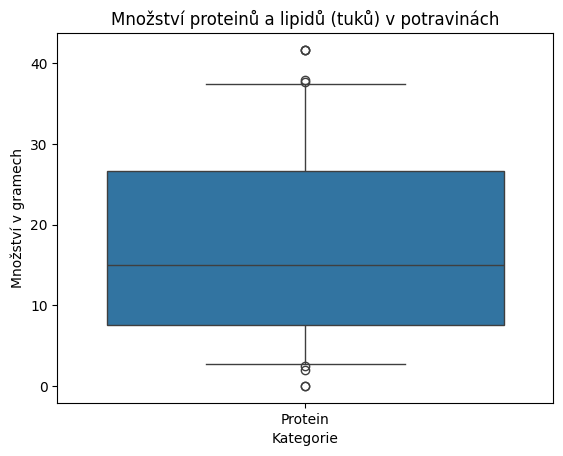

In [38]:
food_merged_brands_box = food_merged_brands[
    (food_merged_brands["nutrient_name"].isin(["Protein", "Lipid (tuk)"]))
    & (food_merged_brands["branded_food_category"] == "En. tyčinky")
]
food_merged_brands_box

ax = sns.boxplot(food_merged_brands_box, x="nutrient_name", y="amount", hue="nutrient_name",  whis=[3, 97])
ax.set(
    xlabel="Kategorie",
    ylabel="Množství v gramech", 
    title="Množství proteinů a lipidů (tuků) v potravinách",
)

---
## Cvičení

### Odstín

V rámci lekce jsme porovnávali množství proteinů a lipidů (tuků) v energetických tyčinkách. 

Potřebná data máme v tabulce `food_merged_brands`. 

Podobné srování můžeme udělat i s využitím histogramu. 

Použij funkce histogram pro tabulku `food_merged_brands_box`. 

Abys dokázal(a) rozlišit mezi oběma výživnými látkami, použij parametr `hue`, kterému zadáš jako hodnotu `nutrient_name`. 

Díky tomu bude mít každá výživná látka samostatný sloupec se svojí barvou. 

Dále použij funkci `range`, tentokrát ale rozděl hodnoty po pěti, tj. hranice intervalů budou 0, 5, 10, 15 atd. 

Zobraz si výsledný graf. 

Protože toto zobrazení může být poněkud nepřehledné vyzkoušej ještě přidat parametr `multiple` s hodnotou `stack`.

ValueError: No objects to concatenate

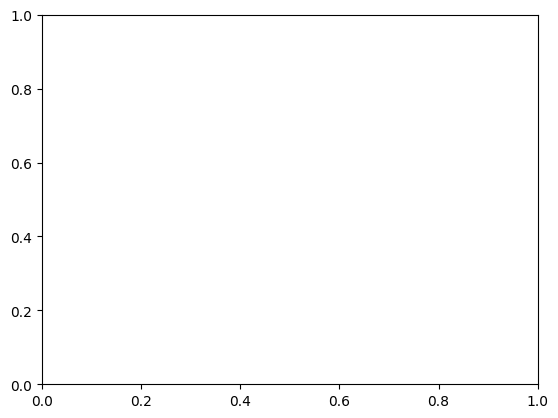

In [37]:
ax = sns.histplot(food_merged_brands_box, x = "amount", hue = "nutrient_name",
                bins=range(0, 100, 5), multiple  = "stack")

[Text(0.5, 0, 'Kategorie'),
 Text(0, 0.5, 'Množství v gramech'),
 Text(0.5, 1.0, 'Množství proteinů a lipidů (tuků) v potravinách')]

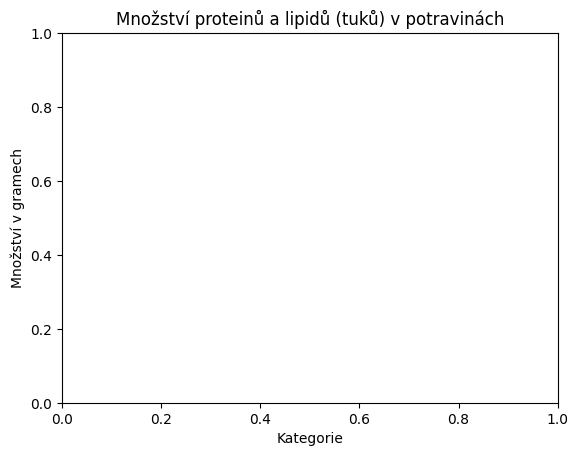

In [29]:
food_merged_brands_box = food_merged_brands[
    (food_merged_brands["nutrient_name"].isin(["Protein", "Lipid (tuk)"]))
    & (food_merged_brands["branded_food_category"] == "En. tyčinky")
]
food_merged_brands_box

ax = sns.boxplot(food_merged_brands_box, x="nutrient_name", y="amount",hue="nutrient_name", whis=[3, 97])
ax.set(
    xlabel="Kategorie",
    ylabel="Množství v gramech",
    title="Množství proteinů a lipidů (tuků) v potravinách",
    
)


### Catplot

Další zajímavý graf, který `seaborn` umí, je `catplot`. Pomocí něj můžeme porovnat obsat výživných látek pro jednotlivé kategorie potravin. Tvým úkolem bude porovnat obsah proteinů a karbohydrátů pro 12 nejčastějších kategorií.

Vytvoř si pomocí dotazu tabulku, ve které budou informace pouze o proteinech a karbohydrátech. Karbohydráty hledej pod názvem `Carbohydrate, by difference`. Můžeš je přejmenovat na "Karbohydráty" pomocí metody `replace`.

Dále použij funkci `catplot`. Její použití je velmi podobné ostatním funkcím. Jako první parametr zadej tabulku s daty, jako parametr `x` sloupeček s názvem kategorie (`food_brands_top_nut_prot`), jako parametr `y` sloupeček `amount` a jako parametr `hue` sloupeček `nutrition_name`. Alternativně můžeš před vygenerováním grafu sloupeček `nutrition_name` přejemnovat například na `Výživná látka`, protože bude použit jako nadpis legendy.

Nech si zobrazit graf. Jednotlivé tečky představují hodnoty pro jednotlivé potraviny, každá tečka reprezentuje jednu potravinu. Barva tečky určuje, o jakou výživnou látku jde. Dále zkus přidat k volání funkce `catplot` parametr s `s` hodnotou 2 a podívej se, jak se graf změnil. Zkus případně i jiného hodnoty tohoto parametru.

Prohlédni si graf a odpověz na otázky:

- Pro jakou kategorii platí, že drtivá většina výrobků má více proteinů než karbohydrátů?
- Pro jakou kategorii platí, že drtivá většina výrobků má více karbohydrátů než proteinů?
- Existuje nějaká kategorie, kde je na výběr alespoň několik produktů s větším množství karbohydrátů než proteinů, ale i několik produktů s větším množstvím proteinů než karbohydrátů?

In [ ]:
food_top_cat_carb = food_top_cat["nutrient_name"].isin(["Carbohydrate, by difference", "Protein"])

,fdc_id,data_type,description,food_category_id,publication_date,nutrient_id,amount,data_points,derivation_id,min,...,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
0,1106032,branded_food,"Chicken, FC Beer Battered Boneless Wing Fritte...",NaN,2020-11-13,1257,NaN,NaN,71.0,NaN,...,Meat/Poultry/Other Animals Prepared/Processed,GDSN,NaN,2020-09-03,2020-11-13,United States,NaN,NaN,NaN,NaN
1,1106032,branded_food,"Chicken, FC Beer Battered Boneless Wing Fritte...",NaN,2020-11-13,1253,24.00,NaN,71.0,NaN,...,Meat/Poultry/Other Animals Prepared/Processed,GDSN,NaN,2020-09-03,2020-11-13,United States,NaN,NaN,NaN,NaN
2,1106032,branded_food,"Chicken, FC Beer Battered Boneless Wing Fritte...",NaN,2020-11-13,1008,141.00,NaN,71.0,NaN,...,Meat/Poultry/Other Animals Prepared/Processed,GDSN,NaN,2020-09-03,2020-11-13,United States,NaN,NaN,NaN,NaN
3,1106032,branded_food,"Chicken, FC Beer Battered Boneless Wing Fritte...",NaN,2020-11-13,1089,1.18,NaN,71.0,NaN,...,Meat/Poultry/Other Animals Prepared/Processed,GDSN,NaN,2020-09-03,2020-11-13,United States,NaN,NaN,NaN,NaN
4,1106032,branded_food,"Chicken, FC Beer Battered Boneless Wing Fritte...",NaN,2020-11-13,1162,0.00,NaN,75.0,NaN,...,Meat/Poultry/Other Animals Prepared/Processed,GDSN,NaN,2020-09-03,2020-11-13,United States,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129279,2662182,branded_food,"ITALIAN-STYLE DICED TOMATOES WITH BASIL, GARLI...",NaN,2023-10-26,1005,4.07,NaN,70.0,NaN,...,Tomatoes,LI,14.5 oz/411 g,2023-09-20,2023-10-26,United States,NaN,NaN,NaN,NaN
129280,2662182,branded_food,"ITALIAN-STYLE DICED TOMATOES WITH BASIL, GARLI...",NaN,2023-10-26,1004,0.41,NaN,70.0,NaN,...,Tomatoes,LI,14.5 oz/411 g,2023-09-20,2023-10-26,United States,NaN,NaN,NaN,NaN
129281,2662182,branded_food,"ITALIAN-STYLE DICED TOMATOES WITH BASIL, GARLI...",NaN,2023-10-26,1003,0.81,NaN,70.0,NaN,...,Tomatoes,LI,14.5 oz/411 g,2023-09-20,2023-10-26,United States,NaN,NaN,NaN,NaN
129282,2662182,branded_food,"ITALIAN-STYLE DICED TOMATOES WITH BASIL, GARLI...",NaN,2023-10-26,1235,0.00,NaN,70.0,NaN,...,Tomatoes,LI,14.5 oz/411 g,2023-09-20,2023-10-26,United States,NaN,NaN,NaN,NaN
